# Определение стоимости автомобилей

<h2> (Тема №11: Численные методы) <a class="tocSkip"> </h2>

<a name="1"></a>
## 1. Содержание

[1. Содержание](#1)

[2. Описание проекта](#2)

*    [2.1. Цель проекта](#21)
*    [2.2. Задачи проекта](#22)
*    [2.3. Описание данных](#23)
*    [2.4. План работы](#24)

[3. Исследование данных](#3)

*    [3.1. Изучение данных](#31)
*    [3.2. Удаление признаков](#32)
*    [3.3. Исследование данных после первичной предобработки](#33)
*    [3.4. Обработка аномалий](#34)
*    [3.5. Обработка пропусков](#35)
*    [3.6. Исследование данных после итоговой предобработки](#36)
*    [3.7. Вывод](#37)

[4. Подготовка к обучению](#4)

*    [4.1. Разделение данных на выборки](#41)
*    [4.2. Кодирование категориальных признаков](#42)
*    [4.3. Масштабирование численных признаков](#43)

    *    [4.3.1. Для моделей `LGBMRegressor` и `RandomForestRegressor`](#431)
    *    [4.3.2. Для модели `CatBoostRegressor`](#432)
        
*    [4.4. Вывод](#44)

[5. Обучение моделей](#5)

*    [5.1. `RandomForestRegressor` + `GridSearchCV`](#51)
*    [5.2. `LGBMRegressor`](#52)
*    [5.3. `LGBMRegressor` + `GridSearchCV`](#53)
*    [5.4. `CatBoostRegressor`](#54)
*    [5.5. `CatBoostRegressor` + `GridSearchCV`](#55)
*    [5.6. Вывод](#56)

[6. Анализ моделей](#6)

*    [6.1. Сравнение моделей](#61)
*    [6.2. Тестирование лучшей модели](#62)
*    [6.3. Итоговое сравнение моделей](#63)
*    [6.4. Вывод](#64)

[7. Общий вывод](#7)

<a name="2"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 2. Описание проекта

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Нам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<a name="21"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 2.1. Цель проекта

Провести исследование с целью построения модели машинного обучения, которая поможет определить рыночную стоимость своего автомобиля.

Результаты исследования позволят сервису по продаже автомобилей разработать приложение для привлечения новых клиентов.

<a name="22"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 2.2. Задачи проекта

1. Исследовать данные.
2. Построить и обучить модели.
3. Проанализировать модели.
4. Протестировать лучшую модель.
5. Написать общий вывод.

Значение метрики *RMSE* должно быть меньше 2500.

<a name="23"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 2.3. Описание данных

В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. 

**Признаки**

- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

**Целевой признак**

`Price` — цена (евро)

<a name="24"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 2.4. План работы

1. Загрузим данные.
2. Изучим данные. Заполним пропущенные значения и обработаем аномалии в признаках. Если среди признаков имеются неинформативные, удалим их.
3. Подготовим выборки для обучения моделей.
4. Обучим разные модели, одна из которых — *LightGBM*, как минимум одна — не бустинг. Для каждой модели попробуем разные гиперпараметры.
5. Проанализируем время обучения, время предсказания и качество моделей.
6. Опираясь на критерии заказчика, выберем лучшую модель, проверим её качество на тестовой выборке.


Чтобы усилить исследование, не будем ограничиваться градиентным бустингом. Попробуем более простые модели — иногда они работают лучше. Эти редкие случаи легко пропустить, если всегда применять только бустинг.

Поэкспериментируем и сравним характеристики моделей: время обучения, время предсказания, точность результата.


Примечания:

- Для оценки качества моделей применим метрику *RMSE*.
- Значение метрики *RMSE* должно быть меньше *2500*.
- Самостоятельно освоим библиотеку *LightGBM* и её средствами построим модели градиентного бустинга.
- Время выполнения ячейки кода *Jupyter Notebook* можно получить специальной командой. Найдём её.
- Модель градиентного бустинга может долго обучаться, поэтому изменим у неё только два-три параметра.
- Если перестанет работать *Jupyter Notebook*, удалим лишние переменные оператором `del`.
```
del features_train
```

<a name="3"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 3. Исследование данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from random import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

RANDOM_STATE = 12345

<a name="31"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.1. Изучение данных

Загрузим данные.

In [2]:
try:
    data = pd.read_csv('/datasets/autos.csv')
except:
    try:
        data = pd.read_csv(r'C:/Users/lorad/OneDrive/Documents/Моя папка/Data Science/Курсы/'
                            'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                            '11. Численные методы/autos.csv')
    except:
        try:
            data = pd.read_csv(r'D:/Юлия/Data Science/Курсы/'
                                'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                                '11. Численные методы/autos.csv')
        except:
            data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/'
            '2PACX-1vTo2pY63iTpyCx47FqtEYTmyNmhwAdLOKq-ETQwnfRhIUE-5-_2TzqmePjc8maRgBOMimrGKkCrXyst/'
                               'pub?gid=1667531997&single=true&output=csv')

In [3]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
data.shape

(354369, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Проверим датасет на наличие явных дубликатов и удалим их.

In [6]:
print(data.duplicated().sum())
data = data.drop_duplicates()
print(data.shape)

4
(354365, 16)


<a name="32"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.2. Удаление признаков

Удалим 6 неинформативных для модели признаков: 
- `DateCrawled` - дата скачивания анкеты из базы, 
- `RegistrationMonth` - месяц регистрации автомобиля,
- `DateCreated` - дата создания анкеты,
- `NumberOfPictures` - количество фотографий автомобиля,
- `PostalCode` - почтовый индекс владельца анкеты (пользователя),
- `LastSeen` - дата последней активности пользователя.

In [7]:
data = data.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', 
                  'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1)
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354365 non-null  int64 
 1   VehicleType       316875 non-null  object
 2   RegistrationYear  354365 non-null  int64 
 3   Gearbox           334532 non-null  object
 4   Power             354365 non-null  int64 
 5   Model             334660 non-null  object
 6   Kilometer         354365 non-null  int64 
 7   FuelType          321470 non-null  object
 8   Brand             354365 non-null  object
 9   Repaired          283211 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


Типы данных соответствуют значениям в признаках.

<a name="33"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.3. Исследование данных после первичной предобработки

Посмотрим описание численных данных.

In [9]:
data.describe()

,Price,RegistrationYear,Power,Kilometer
count,354365.000000,354365.000000,354365.000000,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989
std,4514.176349,90.228466,189.851330,37905.083858
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


При помощи гистограмм визуализируем распределение переменных в датасете.

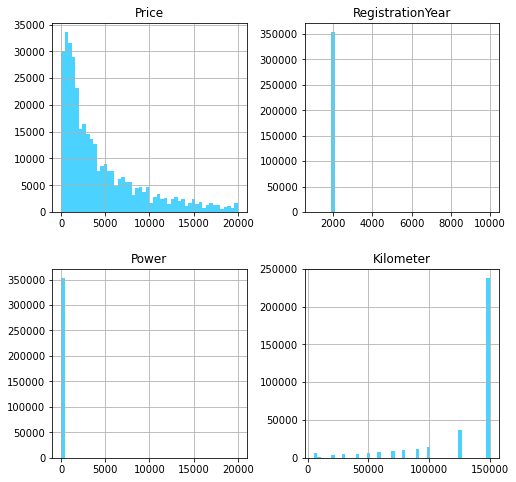

In [10]:
data.hist(figsize=(8, 8), bins=50, alpha=0.7, color='deepskyblue')
plt.show()

Аномалиями здесь можно считать неправдоподобные значения года регистрации, мощности автомобилей и нулевые значения признаков.

Построим диаграммы размаха («ящики с усами») по распределению численных данных при помощи метода `.boxplot()`.

Поясним особенности этой диаграммы.

«Ящик» ограничен первым и третьим квартилями (нижняя и верхняя стороны прямоугольника - границы ящика). Внутри ящика зелёной линией обозначена медиана (второй квартиль).
«Усы» простираются вниз и вверх от границ ящика (чёрные линии ниже и выше границ ящика) на расстояние, равное 1,5 межквартильного размаха (сокращённо *IQR*, от англ. *interquartile range*, «межквартильный размах»). В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Если верхний «ус» длиннее максимума, то он заканчивается максимумом. То же — для минимума и нижнего «уса».

**1. Диаграмма размаха по распределению цены автомобиля (с выбросами).**

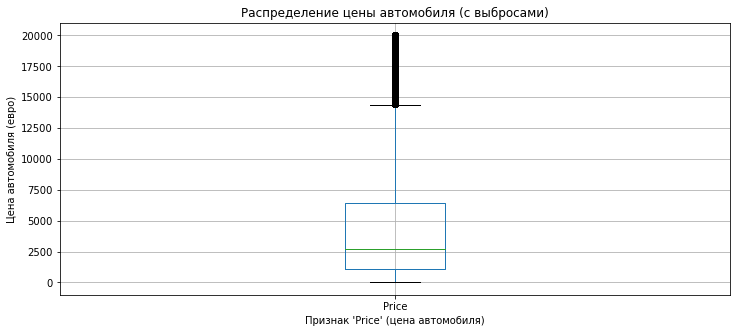

In [11]:
data.boxplot(column='Price', figsize=(12, 5))
plt.xlabel("Признак 'Price' (цена автомобиля)")
plt.ylabel('Цена автомобиля (евро)')
plt.title('Распределение цены автомобиля (с выбросами)')
plt.show()

**2. Диаграмма размаха по распределению года регистрации автомобиля (с выбросами).**

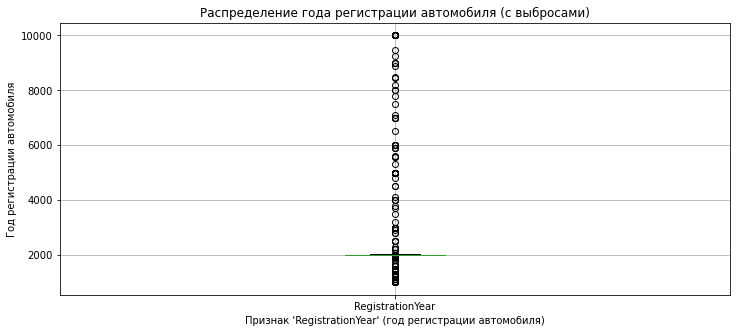

In [12]:
data.boxplot(column='RegistrationYear', figsize=(12, 5))
plt.xlabel("Признак 'RegistrationYear' (год регистрации автомобиля)")
plt.ylabel('Год регистрации автомобиля')
plt.title('Распределение года регистрации автомобиля (с выбросами)')
plt.show()

**3. Диаграмма размаха по распределению мощности автомобиля (с выбросами).**

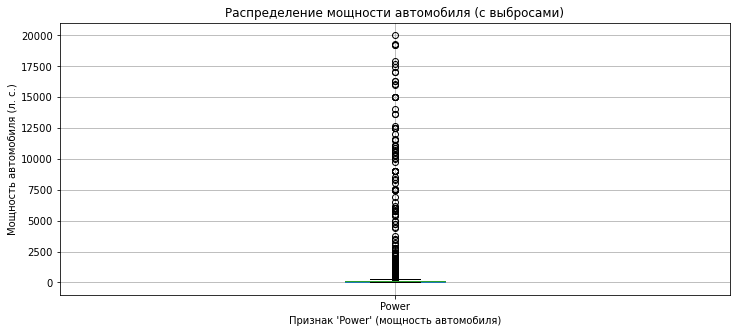

In [13]:
data.boxplot(column='Power', figsize=(12, 5))
plt.xlabel("Признак 'Power' (мощность автомобиля)")
plt.ylabel('Мощность автомобиля (л. с.)')
plt.title('Распределение мощности автомобиля (с выбросами)')
plt.show()

**4. Диаграмма размаха по распределению пробега автомобиля (с выбросами).**

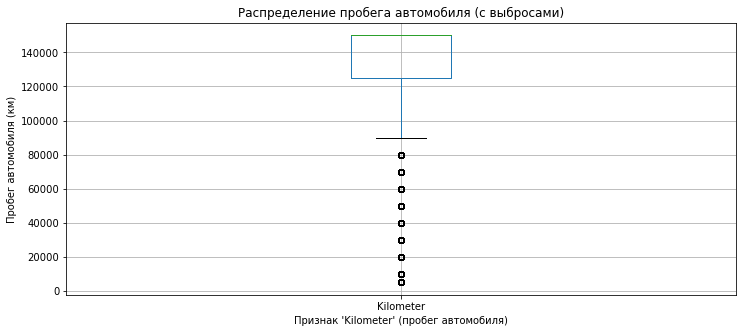

In [14]:
data.boxplot(column='Kilometer', figsize=(12, 5))
plt.xlabel("Признак 'Kilometer' (пробег автомобиля)")
plt.ylabel('Пробег автомобиля (км)')
plt.title('Распределение пробега автомобиля (с выбросами)')
plt.show()

Из-за выбросов сложно рассмотреть распределение внутри ящиков. Поэтому сделаем графики без выбросов, указав параметр `showfliers=False`.

**1. Диаграмма размаха по распределению цены автомобиля (без выбросов).**

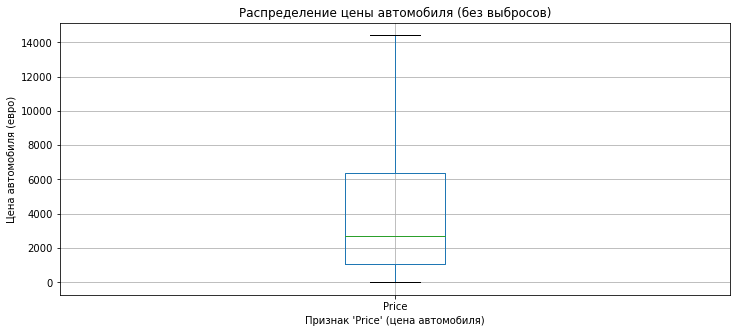

In [15]:
data.boxplot(column='Price', showfliers=False, figsize=(12, 5))
plt.xlabel("Признак 'Price' (цена автомобиля)")
plt.ylabel('Цена автомобиля (евро)')
plt.title('Распределение цены автомобиля (без выбросов)')
plt.show()

**2. Диаграмма размаха по распределению года регистрации автомобиля (без выбросов).**

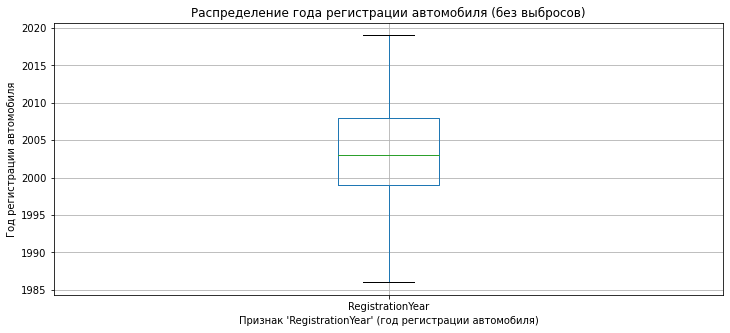

In [16]:
data.boxplot(column='RegistrationYear', showfliers=False, figsize=(12, 5))
plt.xlabel("Признак 'RegistrationYear' (год регистрации автомобиля)")
plt.ylabel('Год регистрации автомобиля')
plt.title('Распределение года регистрации автомобиля (без выбросов)')
plt.show()

**3. Диаграмма размаха по распределению мощности автомобиля (без выбросов).**

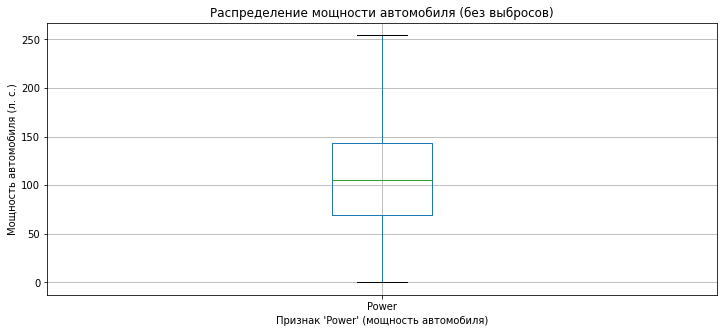

In [17]:
data.boxplot(column='Power', showfliers=False, figsize=(12, 5))
plt.xlabel("Признак 'Power' (мощность автомобиля)")
plt.ylabel('Мощность автомобиля (л. с.)')
plt.title('Распределение мощности автомобиля (без выбросов)')
plt.show()

**4. Диаграмма размаха по распределению пробега автомобиля (без выбросов).**

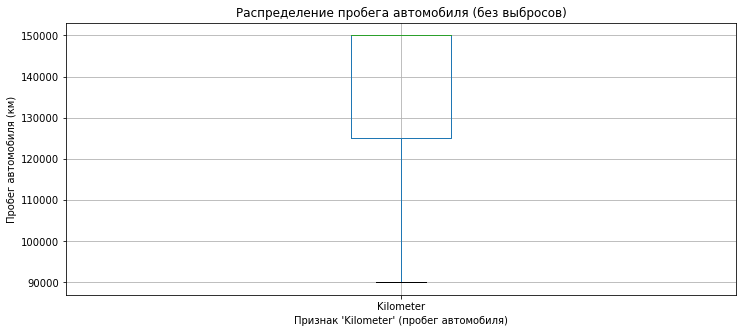

In [18]:
data.boxplot(column='Kilometer', showfliers=False, figsize=(12, 5))
plt.xlabel("Признак 'Kilometer' (пробег автомобиля)")
plt.ylabel('Пробег автомобиля (км)')
plt.title('Распределение пробега автомобиля (без выбросов)')
plt.show()

Интересная ситуация получается для признака `Kilometer`: у него медиана и 75%-ый квартиль равны максимальному значению данных.

Выбросы в признаках `RegistrationYear` и `Power`, очевидно, необходимо корректировать.

Выведем коэффициенты корреляции Пирсона для переменных датасета.

In [19]:
data.corr()

,Price,RegistrationYear,Power,Kilometer
Price,1.000000,0.026916,0.158872,-0.333207
RegistrationYear,0.026916,1.000000,-0.000828,-0.053448
Power,0.158872,-0.000828,1.000000,0.024006
Kilometer,-0.333207,-0.053448,0.024006,1.000000


Построим тепловую карту (хитмэп) коэффициентов корреляции Пирсона для переменных датасета.


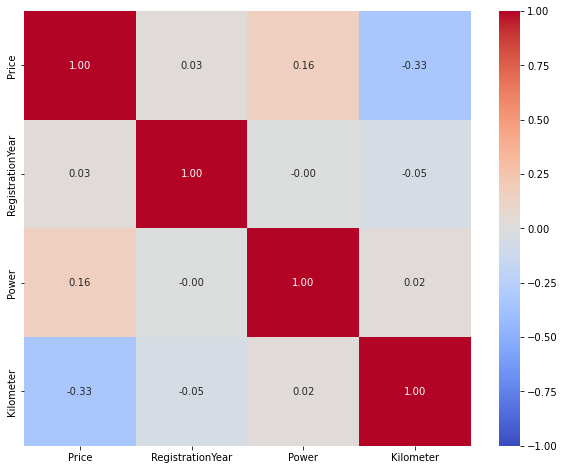

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(
    data.corr(), annot=True, fmt = '.2f', 
    vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.show()

Наблюдается незначительная обратная корреляция между признаками `Kilometer` и `Price`, что логично. Чем больше пробег - тем ниже цена.

<a name="34"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.4. Обработка аномалий

Посмотрим состав численных признаков `Price`, `RegistrationYear`, `Power` и `Kilometer`.

In [21]:
data[['Price', 'RegistrationYear', 'Power', 'Kilometer']].describe()

,Price,RegistrationYear,Power,Kilometer
count,354365.000000,354365.000000,354365.000000,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989
std,4514.176349,90.228466,189.851330,37905.083858
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


Аномалиями здесь можно считать неправдоподобные значения года регистрации автомобилей и нулевые значения признаков.

Посмотрим выборочно количество уникальных значений в признаках.

In [22]:
print(len(data['RegistrationYear'].unique()))
print(len(data['Model'].unique()))
print(len(data['Brand'].unique()))

151
251
40


Посмотрим содержание признаков `DateCrawled`, `RegistrationYear` и `DateCreated`.

In [23]:
try:
    display(pd.read_csv('/datasets/autos.csv')[
        ['DateCrawled', 'RegistrationYear', 'DateCreated']])
except:
    try:
        display(pd.read_csv(r'C:/Users/lorad/OneDrive/Documents/Моя папка/Data Science/Курсы/'
                            'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                            '11. Численные методы/autos.csv')[
            ['DateCrawled', 'RegistrationYear', 'DateCreated']])
    except:
        try:
            display(pd.read_csv(r'D:/Юлия/Data Science/Курсы/'
                                'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                                '11. Численные методы/autos.csv')[
                ['DateCrawled', 'RegistrationYear', 'DateCreated']])
        except:
            display(pd.read_csv('https://docs.google.com/spreadsheets/d/e/'
            '2PACX-1vTo2pY63iTpyCx47FqtEYTmyNmhwAdLOKq-ETQwnfRhIUE-5-_2TzqmePjc8maRgBOMimrGKkCrXyst/'
                               'pub?gid=1667531997&single=true&output=csv')[
                ['DateCrawled', 'RegistrationYear', 'DateCreated']])

,DateCrawled,RegistrationYear,DateCreated
0,2016-03-24 11:52:17,1993,2016-03-24 00:00:00
1,2016-03-24 10:58:45,2011,2016-03-24 00:00:00
2,2016-03-14 12:52:21,2004,2016-03-14 00:00:00
3,2016-03-17 16:54:04,2001,2016-03-17 00:00:00
4,2016-03-31 17:25:20,2008,2016-03-31 00:00:00
...,...,...,...
354364,2016-03-21 09:50:58,2005,2016-03-21 00:00:00
354365,2016-03-14 17:48:27,2005,2016-03-14 00:00:00
354366,2016-03-05 19:56:21,2000,2016-03-05 00:00:00
354367,2016-03-19 18:57:12,1996,2016-03-19 00:00:00


Даты скачивания и создания анкеты приходятся на 2016 год. Значит нужно удалить все строки, в которых автомобили были зарегистрированы позднее 2016 года.

Сохраним в датасете только те автомобили, год регистрации которых входит в диапазон с 1940 по 2016 гг.

In [24]:
data = data[(data['RegistrationYear'] <= 2016) & (data['RegistrationYear'] >= 1940)]
data

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
354364,0,NaN,2005,manual,0,colt,150000,petrol,mitsubishi,yes
354365,2200,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


Повторно посмотрим количество уникальных значений в признаках.

In [25]:
print(len(data['RegistrationYear'].unique()))
print(len(data['Model'].unique()))
print(len(data['Brand'].unique()))

77
251
40


После удаления аномалий уменьшилось количество уникальных значений в признаке `RegistrationYear`. При этом количество уникальных значений в признаке `Model` не изменилось, что означает, что мы сохранили в датасете все возможные модели автомобилей, включая ретро автомобили.

Удалим нули в признаке `Price`, поставим ограничение на значения в `Power` и сбросим индекс в датасете.

In [26]:
data = data[data['Price'] != 0]
data = data[data['Power'] <= 1500]
data = data.reset_index(drop=True)
data

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
329479,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no
329480,2200,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
329481,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
329482,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


Посмотрим количество нулей в признаке `Power`.

In [27]:
data[data['Power'] == 0].shape

(32794, 10)

Заменим нули в признаке `Power` на медиану по бренду.

In [28]:
data.loc[data['Power'] == 0, 'Power'] = np.NaN
data['Power'] = data['Power'].fillna(
    data.groupby('Brand')['Power'].transform(lambda x: x.median() if x.median() else np.nan))
data[data['Power'] == 0].shape

(0, 10)

Повторно посмотрим количество уникальных значений в признаках.

In [29]:
print(len(data['RegistrationYear'].unique()))
print(len(data['Model'].unique()))
print(len(data['Brand'].unique()))

77
251
40


После удаления нулей количество уникальных значений в признаках `RegistrationYear` и `Model` не изменилось.

In [30]:
data[['Price', 'RegistrationYear', 'Power', 'Kilometer']].describe()

,Price,RegistrationYear,Power,Kilometer
count,329484.000000,329484.000000,329484.000000,329484.000000
mean,4607.664491,2002.620088,120.140456,128231.067366
std,4546.198371,6.771335,55.971133,37486.631643
min,1.000000,1940.000000,1.000000,5000.000000
25%,1200.000000,1999.000000,80.000000,125000.000000
50%,2900.000000,2003.000000,109.000000,150000.000000
75%,6600.000000,2007.000000,150.000000,150000.000000
max,20000.000000,2016.000000,1500.000000,150000.000000


<a name="35"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.5. Обработка пропусков

Модель градиентного бустинга *Catboost* не распознаёт тип данных `NaN`, поэтому для её применения в датасете необходимо заполнить пропуски.

Пропуски имеются у следующих признаков:
- `VehicleType` - тип автомобильного кузова;
- `Gearbox` - тип коробки передач;
- `Model` - модель автомобиля;
- `FuelType` - тип топлива;
- `Repaired` - была машина в ремонте или нет.

In [31]:
data.isna().sum()

Price                   0
VehicleType         19884
RegistrationYear        0
Gearbox             15542
Power                   0
Model               15573
Kilometer               0
FuelType            24099
Brand                   0
Repaired            59751
dtype: int64

Посмотрим состав признаков с пропусками.

In [32]:
data['VehicleType'].value_counts()

sedan          89334
small          77970
wagon          63652
bus            28328
convertible    19846
coupe          15621
suv            11784
other           3065
Name: VehicleType, dtype: int64

In [33]:
data['Gearbox'].value_counts()

manual    250987
auto       62955
Name: Gearbox, dtype: int64

In [34]:
data['Model'].value_counts()

golf                  26723
other                 23142
3er                   18663
polo                  12023
corsa                 11586
                      ...  
kalina                    6
rangerover                3
serie_3                   3
range_rover_evoque        2
serie_1                   1
Name: Model, Length: 250, dtype: int64

In [35]:
data['Model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'c_max',
       '3_reihe', 'passat', 'navara', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'arosa', 'other', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'one', 'fortwo',
       '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta', 'fiesta',
       'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'ka', 'a1', 'insignia',
       'combo', 'focus', 'tt', 'corsa', 'a6', 'jazz', 'omega', 'slk',
       '7er', '80', '147', '100', 'z_reihe', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'sharan', '6_reihe', 'c4', 'panda',
       'up', 'i_reihe', 'ceed', '5_reihe', 'yeti', 'octavia', 'zafira',
       'mii', 'rx_reihe', '6er', 'modus', 'fox', 'matiz', 'beetle', 'c1',
       'rio', 'to

In [36]:
data['FuelType'].value_counts()

petrol      204561
gasoline     94803
lpg           5021
cng            531
hybrid         220
other          162
electric        87
Name: FuelType, dtype: int64

In [37]:
data['Repaired'].value_counts()

no     236809
yes     32924
Name: Repaired, dtype: int64

У признаков `VehicleType`, `Model` и `FuelType` одним из значений является "other", поэтому заменим пропуски в этих признаках на дополнительную категорию "another".

In [38]:
data['VehicleType'] = data['VehicleType'].fillna('another')
data['Model'] = data['Model'].fillna('another')
data['FuelType'] = data['FuelType'].fillna('another')
data

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,another,1993,manual,101.0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190.0,another,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163.0,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
329479,1150,bus,2000,manual,101.0,zafira,150000,petrol,opel,no
329480,2200,another,2005,NaN,140.0,another,20000,another,sonstige_autos,NaN
329481,1199,convertible,2000,auto,101.0,fortwo,125000,petrol,smart,no
329482,9200,bus,1996,manual,102.0,transporter,150000,gasoline,volkswagen,no


Категориальные признаки `Gearbox` и `Repaired` принимают только два значения, т.е. являются бинарными. Для работы модели необходимы численные признаки, поэтому мы можем преобразовать значения этих признаков в числа "0" и "1".

Сначала заполним пропуски в признаках `Gearbox` и `Repaired` случайными числами "0" или "1". Для этого применим функцию `randint()`, которая генерирует целые случайные числа в заданном диапазоне.

In [39]:
data['Gearbox'] = data['Gearbox'].fillna(pd.Series(
    np.random.randint(0, 2, size=len(data)), index=data.index))
data['Repaired'] = data['Repaired'].fillna(pd.Series(
    np.random.randint(0, 2, size=len(data)), index=data.index))

print(data['Gearbox'].unique())
print(data['Repaired'].unique())
display(data)

['manual' 'auto' 0 1]
[1 'yes' 'no' 0]


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,another,1993,manual,101.0,golf,150000,petrol,volkswagen,1
1,18300,coupe,2011,manual,190.0,another,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163.0,grand,125000,gasoline,jeep,1
3,1500,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
329479,1150,bus,2000,manual,101.0,zafira,150000,petrol,opel,no
329480,2200,another,2005,0,140.0,another,20000,another,sonstige_autos,0
329481,1199,convertible,2000,auto,101.0,fortwo,125000,petrol,smart,no
329482,9200,bus,1996,manual,102.0,transporter,150000,gasoline,volkswagen,no


Проверим датасет на наличие пропусков:

In [40]:
data.isna().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
Repaired            0
dtype: int64

Затем преобразуем исходные категориальные значения признаков `Gearbox` и `Repaired` в числа "0" и "1".

Для признака `Gearbox` обозначим:
- "0" - для "manual",
- "1" - для "auto".

Для признака `Repaired` обозначим:
- "0" - для "no",
- "1" - для "yes".

In [41]:
data.loc[data['Gearbox'] == 'manual', 'Gearbox'] = 0
data.loc[data['Gearbox'] == 'auto', 'Gearbox'] = 1

data.loc[data['Repaired'] == 'no', 'Repaired'] = 0
data.loc[data['Repaired'] == 'yes', 'Repaired'] = 1

display(data)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,another,1993,0,101.0,golf,150000,petrol,volkswagen,1
1,18300,coupe,2011,0,190.0,another,125000,gasoline,audi,1
2,9800,suv,2004,1,163.0,grand,125000,gasoline,jeep,1
3,1500,small,2001,0,75.0,golf,150000,petrol,volkswagen,0
4,3600,small,2008,0,69.0,fabia,90000,gasoline,skoda,0
...,...,...,...,...,...,...,...,...,...,...
329479,1150,bus,2000,0,101.0,zafira,150000,petrol,opel,0
329480,2200,another,2005,0,140.0,another,20000,another,sonstige_autos,0
329481,1199,convertible,2000,1,101.0,fortwo,125000,petrol,smart,0
329482,9200,bus,1996,0,102.0,transporter,150000,gasoline,volkswagen,0


Преобразуем тип данных у признаков `Gearbox` и `Repaired` в `integer64`:

In [42]:
data['Gearbox'] = data['Gearbox'].astype('int64')
data['Repaired'] = data['Repaired'].astype('int64')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329484 entries, 0 to 329483
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             329484 non-null  int64  
 1   VehicleType       329484 non-null  object 
 2   RegistrationYear  329484 non-null  int64  
 3   Gearbox           329484 non-null  int64  
 4   Power             329484 non-null  float64
 5   Model             329484 non-null  object 
 6   Kilometer         329484 non-null  int64  
 7   FuelType          329484 non-null  object 
 8   Brand             329484 non-null  object 
 9   Repaired          329484 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 25.1+ MB


Данные `data` подготовлены для обучения модели градиентного бустинга *Catboost*.

<a name="36"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.6. Исследование данных после итоговой предобработки

Посмотрим описание данных в итоговом датасете `data`.

In [44]:
data.describe()

,Price,RegistrationYear,Gearbox,Power,Kilometer,Repaired
count,329484.000000,329484.000000,329484.000000,329484.000000,329484.000000,329484.000000
mean,4607.664491,2002.620088,0.214432,120.140456,128231.067366,0.190540
std,4546.198371,6.771335,0.410429,55.971133,37486.631643,0.392728
min,1.000000,1940.000000,0.000000,1.000000,5000.000000,0.000000
25%,1200.000000,1999.000000,0.000000,80.000000,125000.000000,0.000000
50%,2900.000000,2003.000000,0.000000,109.000000,150000.000000,0.000000
75%,6600.000000,2007.000000,0.000000,150.000000,150000.000000,0.000000
max,20000.000000,2016.000000,1.000000,1500.000000,150000.000000,1.000000


При помощи гистограмм визуализируем распределение переменных в итоговом датасете `data`.

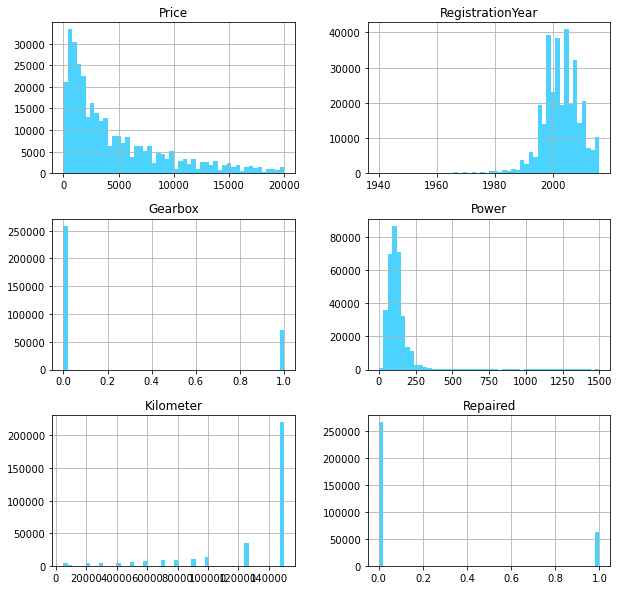

In [45]:
data.hist(figsize=(10, 10), bins=50, alpha=0.7, color='deepskyblue')
plt.show()

Выведем коэффициенты корреляции Пирсона для переменных итогового датасета `data`.

In [46]:
data.corr()

,Price,RegistrationYear,Gearbox,Power,Kilometer,Repaired
Price,1.000000,0.447416,0.223656,0.459619,-0.354344,-0.234035
RegistrationYear,0.447416,1.000000,0.029315,0.113172,-0.231562,-0.115280
Gearbox,0.223656,0.029315,1.000000,0.361052,0.008330,-0.009416
Power,0.459619,0.113172,0.361052,1.000000,0.091374,-0.061890
Kilometer,-0.354344,-0.231562,0.008330,0.091374,1.000000,0.077437
Repaired,-0.234035,-0.115280,-0.009416,-0.061890,0.077437,1.000000


Построим тепловую карту (хитмэп) коэффициентов корреляции Пирсона для переменных датасета `data`.

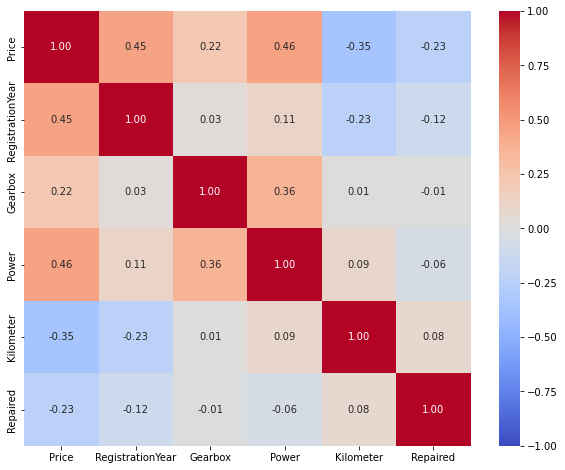

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, fmt = '.2f', 
            vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.show()

Наблюдается незначительная прямая корреляция между признаками `RegistrationYear`, `Power` и `Price`, а также обратная корреляция между признаками `Kilometer` и `Price`, что логично. Чем новее автомобиль и больше мощность, тем выше цена. И, наоборот, чем больше пробег - тем ниже цена.

<a name="37"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.7. Вывод

В разделе [**Исследование данных**](#3.-Исследование-данных) были выполнены следующие задачи:
1. Данные изучены.
2. Явные дубликаты удалены.
3. Неинформативные признаки удалены.
4. Проведено исследование данных после первичной предобработки.
5. Выполнена обработка аномалий.
6. Выполнена обработка пропусков.
7. Проведено исследование данных после итоговой предобработки.


В результате выполнения задач этого раздела было выявлено следующее:
- Наблюдается незначительная прямая корреляция между признаками `RegistrationYear`, `Power` и `Price`, а также обратная корреляция между признаками `Kilometer` и `Price`, что логично. Чем новее автомобиль и больше мощность, тем выше цена. И, наоборот, чем больше пробег - тем ниже цена.
- Распределения значений признаков стали более правдоподобными.

**В проекте решается задача регрессии.**

Таким образом, данные подготовлены для обучения моделей.

<a name="4"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 4. Подготовка к обучению

<a name="41"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 4.1. Разделение данных на выборки

Подготовим выборки из датасета `data` с заполненными пропущенными значениями.

Разобьём данные, выделив целевой признак.

In [48]:
features = data.drop('Price', axis=1)
target = data['Price']

Разделим данные на обучающую, валидационную и тестовую выборки в пропорции 3:1:1.

Сначала разделим полученые данные на промежуточную (`train_valid`) (80%) и тестовую (20%) выборки.

In [49]:
features_train_valid, features_test,\
target_train_valid, target_test = train_test_split(
    features, target, test_size=0.20, random_state=RANDOM_STATE)

Затем разделим промежуточную выборку (`train_valid`) на обучающую и валидационную (25% от промежуточной выборки = 20% от исходного датасета).

In [50]:
features_train, features_valid,\
target_train, target_valid = train_test_split(
    features_train_valid, target_train_valid, 
    test_size=0.25, random_state=RANDOM_STATE)

Сбросим индексы. Это понадобится для последующего кодирования.

In [51]:
features_train = features_train.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)

features_train_valid = features_train_valid.reset_index(drop=True)
target_train_valid = target_train_valid.reset_index(drop=True)

features_valid = features_valid.reset_index(drop=True)
target_valid = target_valid.reset_index(drop=True)

features_test = features_test.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

<a name="42"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 4.2. Кодирование категориальных признаков

Модели градиентного бустинга `LGBMRegressor` и случайного леса `RandomForestRegressor` не распознают тип данных `object`, поэтому для их применения необходимо преобразовать категориальные признаки в численные.

Посмотрим, какие категориальные признаки нужно преобразовать в численные.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329484 entries, 0 to 329483
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             329484 non-null  int64  
 1   VehicleType       329484 non-null  object 
 2   RegistrationYear  329484 non-null  int64  
 3   Gearbox           329484 non-null  int64  
 4   Power             329484 non-null  float64
 5   Model             329484 non-null  object 
 6   Kilometer         329484 non-null  int64  
 7   FuelType          329484 non-null  object 
 8   Brand             329484 non-null  object 
 9   Repaired          329484 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 25.1+ MB


Итак, в численные необходимо преобразовать признаки `VehicleType`, `Model`, `FuelType` и `Brand`.

Преобразуем категориальные признаки в численные с помощью техники порядкового кодирования *(Ordinal Encoding)*. Для этого применим к данным функцию `OrdinalEncoder()`.

В переменной `categorical` сохраним список категориальных признаков.

In [53]:
categorical = ['VehicleType', 'Model', 'FuelType', 'Brand']

In [54]:
# создадим копии выборок для последующего кодирования категориальных признаков
features_train_ordinal = features_train.copy()
features_train_valid_ordinal = features_train_valid.copy()
features_valid_ordinal = features_valid.copy()
features_test_ordinal = features_test.copy()


# создадим объект класса OrdinalEncoder()
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 


# получим список категориальных признаков с помощью метода fit() 
# и преобразуем данные на обучающей выборке с помощью transform()
features_train_ordinal[categorical] = encoder.fit_transform(
    features_train_ordinal[categorical])

# преобразуем данные на промежуточной выборке
features_train_valid_ordinal[categorical] = encoder.transform(
    features_train_valid_ordinal[categorical])

# преобразуем данные на валидационной выборке
features_valid_ordinal[categorical] = encoder.transform(
    features_valid_ordinal[categorical])

# преобразуем данные на тестовой выборке
features_test_ordinal[categorical] = encoder.transform(
    features_test_ordinal[categorical])


display("Выборка 'train'", features_train_ordinal.head())
display("Выборка 'train_valid'", features_train_valid_ordinal.head())
display("Выборка 'valid'", features_valid_ordinal.head())
display("Выборка 'test'", features_test_ordinal.head())

"Выборка 'train'"

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,1.0,2007,0,131.0,225.0,20000,3.0,38.0,0
1,8.0,2000,0,118.0,11.0,150000,7.0,2.0,0
2,6.0,2006,0,54.0,108.0,90000,7.0,38.0,0
3,0.0,1995,1,150.0,167.0,150000,0.0,20.0,1
4,6.0,2002,0,58.0,84.0,125000,7.0,24.0,0


"Выборка 'train_valid'"

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,5.0,2008,0,344.0,141.0,125000,7.0,30.0,0
1,2.0,1997,1,193.0,209.0,80000,7.0,20.0,0
2,5.0,2006,0,177.0,15.0,150000,7.0,2.0,0
3,6.0,2001,0,101.0,129.0,150000,0.0,10.0,0
4,6.0,2000,0,75.0,40.0,150000,7.0,33.0,0


"Выборка 'valid'"

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,7.0,2008,1,141.0,181.0,100000,7.0,23.0,0
1,2.0,2008,1,230.0,62.0,150000,7.0,39.0,0
2,5.0,2009,0,80.0,117.0,80000,7.0,38.0,0
3,2.0,1995,0,75.0,117.0,150000,7.0,38.0,0
4,7.0,2011,0,178.0,167.0,80000,3.0,22.0,0


"Выборка 'test'"

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,0.0,1970,1,90.0,40.0,100000,0.0,24.0,0
1,5.0,2010,0,170.0,60.0,90000,3.0,20.0,0
2,6.0,2009,0,60.0,170.0,50000,7.0,9.0,0
3,6.0,2001,0,50.0,144.0,80000,7.0,38.0,0
4,5.0,2002,0,75.0,117.0,150000,7.0,38.0,0


<a name="43"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 4.3. Масштабирование численных признаков

<a name="431"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
#### 4.3.1. Для моделей `LGBMRegressor` и `RandomForestRegressor` 

Масштабируем численные признаки **для моделей градиентного бустинга `LGBMRegressor` и случайного леса `RandomForestRegressor`**, используя данные с **кодированными** категориальными признаками. Для этого стандартизируем данные с помощью класса `StandardScaler()`.

В переменной `numeric` сохраним список всех численных признаков, оставшихся после кодирования категориальных признаков. После кодирования - все признаки стали численными, поэтому можем указать названия всех признаков каждой из выборок.

In [55]:
numeric = features_train_ordinal.columns
numeric

Index(['VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
       'Kilometer', 'FuelType', 'Brand', 'Repaired'],
      dtype='object')

In [56]:
# создадим копии выборок для последующего масштабирования численных признаков
features_train_ordinal_scaler = features_train_ordinal.copy()
features_train_valid_ordinal_scaler = features_train_valid_ordinal.copy()
features_valid_ordinal_scaler = features_valid_ordinal.copy()
features_test_ordinal_scaler = features_test_ordinal.copy()


# добавим эту строку, чтобы не появлялось предупреждение 'SettingWithCopy'
pd.options.mode.chained_assignment = None


# создадим объект класса StandardScaler()
scaler = StandardScaler() 

# с помощью метода .fit() настроим объект на обучающих данных 
# (настройка — это вычисление среднего и дисперсии)
scaler.fit(features_train_ordinal_scaler[numeric])

# преобразуем обучающую выборку функцией transform(), 
# (т.е. нормируем значения признаков - 
# все значения становятся в диапазоне от 0 до 1)
features_train_ordinal_scaler[numeric] = scaler.transform(
    features_train_ordinal_scaler[numeric])

# преобразуем промежуточную выборку функцией transform()
features_train_valid_ordinal_scaler[numeric] = scaler.transform(
    features_train_valid_ordinal_scaler[numeric])

# преобразуем валидационную выборку функцией transform()
features_valid_ordinal_scaler[numeric] = scaler.transform(
    features_valid_ordinal_scaler[numeric])

# преобразуем тестовую выборку функцией transform()
features_test_ordinal_scaler[numeric] = scaler.transform(
    features_test_ordinal_scaler[numeric])


display("Выборка 'train'", features_train_ordinal_scaler.head())
display("Выборка 'train_valid'", features_train_valid_ordinal_scaler.head())
display("Выборка 'valid'", features_valid_ordinal_scaler.head())
display("Выборка 'test'", features_test_ordinal_scaler.head())

"Выборка 'train'"

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,-1.654674,0.648150,-0.522310,0.198837,1.674312,-2.885209,-0.987591,1.292784,-0.486732
1,1.268714,-0.385121,-0.522310,-0.035805,-1.346951,0.581310,0.732959,-1.416385,-0.486732
2,0.433460,0.500540,-0.522310,-1.190968,0.022500,-1.018622,0.732959,1.292784,-0.486732
3,-2.072300,-1.123172,1.914571,0.541776,0.855465,0.581310,-2.278004,-0.061801,2.054520
4,0.433460,-0.089900,-0.522310,-1.118770,-0.316333,-0.085328,0.732959,0.239218,-0.486732


"Выборка 'train_valid'"

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,0.015833,0.795761,-0.522310,4.043363,0.488396,-0.085328,0.732959,0.690746,-0.486732
1,-1.237047,-0.827951,1.914571,1.317901,1.448423,-1.285277,0.732959,-0.061801,-0.486732
2,0.015833,0.500540,-0.522310,1.029110,-1.290478,0.581310,0.732959,-1.416385,-0.486732
3,0.433460,-0.237511,-0.522310,-0.342645,0.318979,0.581310,-2.278004,-0.814348,-0.486732
4,0.433460,-0.385121,-0.522310,-0.811930,-0.937527,0.581310,0.732959,0.916510,-0.486732


"Выборка 'valid'"

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,0.851087,0.795761,1.914571,0.379331,1.053118,-0.751966,0.732959,0.163963,-0.486732
1,-1.237047,0.795761,1.914571,1.985729,-0.626930,0.581310,0.732959,1.368039,-0.486732
2,0.015833,0.943371,-0.522310,-0.721683,0.149563,-1.285277,0.732959,1.292784,-0.486732
3,-1.237047,-1.123172,-0.522310,-0.811930,0.149563,0.581310,0.732959,1.292784,-0.486732
4,0.851087,1.238591,-0.522310,1.047160,0.855465,-1.285277,-0.987591,0.088709,-0.486732


"Выборка 'test'"

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,-2.072300,-4.813426,1.914571,-0.541189,-0.937527,-0.751966,-2.278004,0.239218,-0.486732
1,0.015833,1.090981,-0.522310,0.902764,-0.655166,-1.018622,-0.987591,-0.061801,-0.486732
2,0.433460,0.943371,-0.522310,-1.082671,0.897819,-2.085243,0.732959,-0.889602,-0.486732
3,0.433460,-0.237511,-0.522310,-1.263166,0.530750,-1.285277,0.732959,1.292784,-0.486732
4,0.015833,-0.089900,-0.522310,-0.811930,0.149563,0.581310,0.732959,1.292784,-0.486732


Проверим типы данных признаков.

In [57]:
features_train_ordinal_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197690 entries, 0 to 197689
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   VehicleType       197690 non-null  float64
 1   RegistrationYear  197690 non-null  float64
 2   Gearbox           197690 non-null  float64
 3   Power             197690 non-null  float64
 4   Model             197690 non-null  float64
 5   Kilometer         197690 non-null  float64
 6   FuelType          197690 non-null  float64
 7   Brand             197690 non-null  float64
 8   Repaired          197690 non-null  float64
dtypes: float64(9)
memory usage: 13.6 MB


<a name="432"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
#### 4.3.2. Для модели `CatBoostRegressor`

Отдельно масштабируем численные признаки **для модели градиентного бустинга `CatBoostRegressor`**, используя данные с **некодированными** категориальными признаками.

*CatBoost* применяет различные техники кодирования категориальных признаков. И дополнительное преобразование категориальных признаков в численные здесь не нужно.

Посмотрим, какие численные признаки нужно масштабировать.

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329484 entries, 0 to 329483
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             329484 non-null  int64  
 1   VehicleType       329484 non-null  object 
 2   RegistrationYear  329484 non-null  int64  
 3   Gearbox           329484 non-null  int64  
 4   Power             329484 non-null  float64
 5   Model             329484 non-null  object 
 6   Kilometer         329484 non-null  int64  
 7   FuelType          329484 non-null  object 
 8   Brand             329484 non-null  object 
 9   Repaired          329484 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 25.1+ MB


В переменной `numeric_2` сохраним список всех численных признаков без предварительного кодирования категориальных признаков.

In [59]:
numeric_2 = ['RegistrationYear', 'Gearbox', 'Power', 'Kilometer', 'Repaired']

In [60]:
# создадим копии выборок для последующего масштабирования численных признаков
features_train_scaler = features_train.copy()
features_train_valid_scaler = features_train_valid.copy()
features_valid_scaler = features_valid.copy()
features_test_scaler = features_test.copy()


# добавим эту строку, чтобы не появлялось предупреждение 'SettingWithCopy'
pd.options.mode.chained_assignment = None


# создадим объект класса StandardScaler()
scaler = StandardScaler() 

# с помощью метода .fit() настроим объект на обучающих данных 
# (настройка — это вычисление среднего и дисперсии)
scaler.fit(features_train_scaler[numeric_2])

# преобразуем обучающую выборку функцией transform(), 
# (т.е. нормируем значения признаков - 
# все значения становятся в диапазоне от 0 до 1)
features_train_scaler[numeric_2] = scaler.transform(
    features_train_scaler[numeric_2])

# преобразуем промежуточную выборку функцией transform()
features_train_valid_scaler[numeric_2] = scaler.transform(
    features_train_valid_scaler[numeric_2])

# преобразуем валидационную выборку функцией transform()
features_valid_scaler[numeric_2] = scaler.transform(
    features_valid_scaler[numeric_2])

# преобразуем тестовую выборку функцией transform()
features_test_scaler[numeric_2] = scaler.transform(
    features_test_scaler[numeric_2])


display("Выборка 'train'", features_train_scaler.head())
display("Выборка 'train_valid'", features_train_valid_scaler.head())
display("Выборка 'valid'", features_valid_scaler.head())
display("Выборка 'test'", features_test_scaler.head())

"Выборка 'train'"

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,bus,0.648150,-0.522310,0.198837,transporter,-2.885209,gasoline,volkswagen,-0.486732
1,wagon,-0.385121,-0.522310,-0.035805,3er,0.581310,petrol,bmw,-0.486732
2,small,0.500540,-0.522310,-1.190968,fox,-1.018622,petrol,volkswagen,-0.486732
3,another,-1.123172,1.914571,0.541776,other,0.581310,another,mercedes_benz,2.054520
4,small,-0.089900,-0.522310,-1.118770,corsa,-0.085328,petrol,opel,-0.486732


"Выборка 'train_valid'"

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,sedan,0.795761,-0.522310,4.043363,leon,-0.085328,petrol,seat,-0.486732
1,convertible,-0.827951,1.914571,1.317901,slk,-1.285277,petrol,mercedes_benz,-0.486732
2,sedan,0.500540,-0.522310,1.029110,5er,0.581310,petrol,bmw,-0.486732
3,small,-0.237511,-0.522310,-0.342645,ka,0.581310,another,ford,-0.486732
4,small,-0.385121,-0.522310,-0.811930,another,0.581310,petrol,sonstige_autos,-0.486732


"Выборка 'valid'"

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,suv,0.795761,1.914571,0.379331,qashqai,-0.751966,petrol,nissan,-0.486732
1,convertible,0.795761,1.914571,1.985729,c_reihe,0.581310,petrol,volvo,-0.486732
2,sedan,0.943371,-0.522310,-0.721683,golf,-1.285277,petrol,volkswagen,-0.486732
3,convertible,-1.123172,-0.522310,-0.811930,golf,0.581310,petrol,volkswagen,-0.486732
4,suv,1.238591,-0.522310,1.047160,other,-1.285277,gasoline,mitsubishi,-0.486732


"Выборка 'test'"

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,another,-4.813426,1.914571,-0.541189,another,-0.751966,another,opel,-0.486732
1,sedan,1.090981,-0.522310,0.902764,c_klasse,-1.018622,gasoline,mercedes_benz,-0.486732
2,small,0.943371,-0.522310,-1.082671,panda,-2.085243,petrol,fiat,-0.486732
3,small,-0.237511,-0.522310,-1.263166,lupo,-1.285277,petrol,volkswagen,-0.486732
4,sedan,-0.089900,-0.522310,-0.811930,golf,0.581310,petrol,volkswagen,-0.486732


<a name="44"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 4.4. Вывод

В разделе [**Подготовка к обучению**](#4.-Подготовка-к-обучению) были выполнены следующие задачи:
1. Данные разделены на выборки.
2. Выполнено кодирование категориальных признаков с помощью техники порядкового кодирования *Ordinal Encoding*.
3. Выполнено масштабирование численных признаков для разных моделей.

<a name="5"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 5. Обучение моделей

Обучим разные модели, одна из которых — *LightGBM*, как минимум одна — не бустинг. Для каждой модели попробуем разные гиперпараметры.

Для наглядности напишем ниже какие переменные (выборки), где и почему мы будем использовать далее для обучения моделей.

Для *Random Forest* и *LightGBM* (с *Ordinal Encoding*):

- **features_train_ordinal_scaler**
- target_train
- **features_valid_ordinal_scaler**
- target_valid
-
- **features_train_valid_ordinal_scaler**
- target_train_valid
- **features_test_ordinal_scaler**
- target_test


Для *Catboost* (без *Ordinal Encoding*):

- **features_train_scaler**
- target_train
- features_valid_scaler
- target_valid
-
- **features_train_valid_scaler**
- target_train_valid
- features_test_scaler
- target_test

Зададим параметры для кроссвалидации: `n_splits` - количество фолдов.

In [61]:
kf = KFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)

<a name="51"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.1. `RandomForestRegressor` + `GridSearchCV`

Построим модель **случайного леса *Random Forest*** - `RandomForestRegressor`. Для получения лучшей модели `RandomForestRegressor` можно автоматически подбирать гиперпараметры с помощью функции **`GridSearchCV`**. Функция `GridSearchCV` самостоятельно делит выборку на обучающую и валидационную. Поэтому мы можем её применить к промежуточной выборке `train_valid`, оставшейся после выделения тестовой выборки из исходных данных.

Для модели *Random Forest* возьмём преобразованные данные `_ordinal_scaler` (с порядковым кодированием *Ordinal Encoding*), т.к. модель случайного леса не распознаёт тип данных `object`.

In [62]:
%%time


# построим модель случайного леса для задачи регрессии
model_rf_gscv = RandomForestRegressor(random_state=RANDOM_STATE)

# создадим словарь с гиперпараметрами для модели
parameters = {'max_depth': range (6, 10, 2),
              'n_estimators': range (50, 101, 50)}  

# подберём гиперпараметры с помощью GridSearchCV
rf_gscv_result = GridSearchCV(model_rf_gscv, 
                              parameters, 
                              scoring='neg_root_mean_squared_error', 
                              cv=3, 
                              n_jobs=-1, 
                              verbose=3)

# обучим модель
rf_gscv_result.fit(
    features_train_valid_ordinal_scaler, target_train_valid)

# получим предсказания
predictions = rf_gscv_result.predict(
    features_train_valid_ordinal_scaler)


print('Best RMSE RF + GridSearchCV:', 
      f'{abs(rf_gscv_result.best_score_):.0f}')
print('Best model RF + GridSearchCV:', 
      rf_gscv_result.best_estimator_)
print('Best params RF + GridSearchCV:', 
      rf_gscv_result.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best RMSE RF + GridSearchCV: 2077
Best model RF + GridSearchCV: RandomForestRegressor(max_depth=8, random_state=12345)
Best params RF + GridSearchCV: {'max_depth': 8, 'n_estimators': 100}
CPU times: total: 29.8 s
Wall time: 1min 42s


In [63]:
# время обучения и предсказания модели
rf_gscv_res = pd.DataFrame(
    rf_gscv_result.cv_results_).sort_values(by='rank_test_score')
rf_gscv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,42.218495,1.688979,0.606430,0.035042,8,100,"{'max_depth': 8, 'n_estimators': 100}",-2069.346252,-2073.600505,-2086.653429,-2076.533395,7.363694,1
2,28.322733,0.645870,0.454265,0.030210,8,50,"{'max_depth': 8, 'n_estimators': 50}",-2070.608553,-2073.240304,-2087.306501,-2077.051786,7.330344,2
1,45.708071,0.945187,0.830322,0.076394,6,100,"{'max_depth': 6, 'n_estimators': 100}",-2285.406434,-2273.572553,-2299.554919,-2286.177969,10.621277,3
0,22.031777,0.418628,0.303988,0.011587,6,50,"{'max_depth': 6, 'n_estimators': 50}",-2285.610037,-2274.399224,-2298.840215,-2286.283159,9.989339,4


In [64]:
print('Время обучения модели:', 
      f'{rf_gscv_res.iloc[0]["mean_fit_time"]:.2f} s')
print('Время предсказания модели:', 
      f'{rf_gscv_res.iloc[0]["mean_score_time"]:.2f} s')

Время обучения модели: 42.22 s
Время предсказания модели: 0.61 s


Лучшая модель случайного леса **`RandomForestRegressor`** с `GridSearchCV` имеет значения метрик оценки качества:
- ***RMSE = 2077***
- время обучения модели: ***42.22 s***
- время предсказания модели: ***0.61 s***

при следующих параметрах:
- глубина дерева: `max_depth` = 8
- количество деревьев (итераций): `n_estimators` = 100

<a name="52"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.2. `LGBMRegressor`

Построим модель **градиентного бустинга *LightGBM*** - `LGBMRegressor`. Для модели `LGBMRegressor` возьмём преобразованные данные `_ordinal_scaler` (с порядковым кодированием *Ordinal Encoding*), т.к. модель *LightGBM* не распознаёт тип данных `object`.

In [65]:
%%time


# построим модель LightGBM для задачи регрессии
model_lgbm = LGBMRegressor(
    # максимальная глубина дерева
    max_depth=10,
    # количество деревьев (итераций)
    n_estimators=300,
    # коэффициент скорости обучения (размер шага градиентного спуска)
    learning_rate=0.15,
    random_state=RANDOM_STATE,
    # контроль переобучения
    early_stopping_rounds=10
)


# Обучим модель:

# старт отсчёта времени обучения
start = time.time()
model_lgbm.fit(features_train_ordinal_scaler, 
               target_train, 
               eval_set=[(features_valid_ordinal_scaler, target_valid)],
               eval_metric='rmse', 
               verbose=10)
# отметка завершения отсчёта времени обучения
end = time.time()
# время обучения модели
fit_time_lgbm = end - start


# Получим предсказания:

predictions = model_lgbm.predict(features_valid_ordinal_scaler)
# время предсказания
predict_time_lgbm = time.time() - end


# Получим метрику RMSE:

rmse_lgbm = mean_squared_error(target_valid, 
                               predictions, 
                               # параметр squared=False возвращает RMSE
                               squared=False)


print('RMSE модели LightGBM:', f'{rmse_lgbm:.0f}')
print('Время обучения модели:', f'{fit_time_lgbm:.2f} s')
print('Время предсказания модели:', f'{predict_time_lgbm:.2f} s')

[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[10]	valid_0's rmse: 2318.91	valid_0's l2: 5.37736e+06
[20]	valid_0's rmse: 1967.46	valid_0's l2: 3.8709e+06
[30]	valid_0's rmse: 1872.46	valid_0's l2: 3.50609e+06
[40]	valid_0's rmse: 1826.11	valid_0's l2: 3.33468e+06
[50]	valid_0's rmse: 1797.05	valid_0's l2: 3.22939e+06
[60]	valid_0's rmse: 1778.72	valid_0's l2: 3.16386e+06
[70]	valid_0's rmse: 1763.28	valid_0's l2: 3.10915e+06
[80]	valid_0's rmse: 1750.57	valid_0's l2: 3.0645e+06
[90]	valid_0's rmse: 1741.61	valid_0's l2: 3.03321e+06
[100]	valid_0's rmse: 1732.53	valid_0's l2: 3.00167e+06
[110]	valid_0's rmse: 1725.09	valid_0's l2: 2.97595e+06
[120]	valid_0's rmse: 1717.31	valid_0's l2: 2.94916e+06
[130]	valid_0's rmse: 1710.14	valid_0's l2: 2.92457e+06
[140]	valid_0's rmse: 1705.11	valid_0's l2: 2.90741e+06
[150]	valid_0's rmse: 1700.45	valid_0's l2: 2.89153e+06
[160]	valid_0's rmse: 1695.93	valid_0

Модель градиентного бустинга **`LGBMRegressor`** имеет значения метрик оценки качества:
- ***RMSE = 1659***
- время обучения модели: ***1.40 s***
- время предсказания модели: ***0.18 s***

при следующих параметрах:
- глубина дерева: `max_depth` = 10
- количество деревьев (итераций): `n_estimators` = 300
- коэффициент скорости обучения (размер шага градиентного спуска): `learning_rate` = 0.15

<a name="53"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.3. `LGBMRegressor` + `GridSearchCV`

Для получения лучшей модели **градиентного бустинга *LightGBM*** можно автоматически подбирать гиперпараметры с помощью функции **`GridSearchCV`**. Функция `GridSearchCV` самостоятельно делит выборку на обучающую и валидационную. Поэтому мы можем её применить к промежуточной выборке `train_valid`, оставшейся после выделения тестовой выборки из исходных данных.

Для модели *LightGBM* возьмём преобразованные данные `_ordinal_scaler` (с порядковым кодированием *Ordinal Encoding*), т.к. модель *LightGBM* не распознаёт тип данных `object`.

In [66]:
%%time


# построим модель LightGBM для задачи регрессии
model_lgbm_gscv = LGBMRegressor(
    # коэффициент скорости обучения (размер шага градиентного спуска)
    learning_rate=0.15, 
    random_state=RANDOM_STATE
)

# создадим словарь с гиперпараметрами для модели
parameters = {
    # максимальная глубина дерева
    'max_depth': [6, 8],
    # количество деревьев
    'n_estimators': [200, 400],
    # рассчитываемая метрика RMSE
    'metric': ['rmse'],
    # ['dart'] (тип алгоритма)
    'boosting_type': ['gbdt']
}


# подберём гиперпараметры с помощью GridSearchCV
lgbm_gscv_result = GridSearchCV(model_lgbm_gscv, 
                                parameters, 
                                cv=kf, 
                                scoring='neg_root_mean_squared_error', 
                                verbose=50)

# обучим модель
lgbm_gscv_result.fit(
    features_train_valid_ordinal_scaler, target_train_valid)

# получим предсказания
predictions = lgbm_gscv_result.predict(
    features_train_valid_ordinal_scaler)


print('Best RMSE LightGBM + GridSearchCV:', 
      f'{abs(lgbm_gscv_result.best_score_):.0f}')
print('Best model LightGBM + GridSearchCV:', 
      lgbm_gscv_result.best_estimator_)
print('Best params LightGBM + GridSearchCV:', 
      lgbm_gscv_result.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200
[CV 1/5; 1/4] END boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200;, score=-1698.073 total time=   0.9s
[CV 2/5; 1/4] START boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200
[CV 2/5; 1/4] END boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200;, score=-1691.318 total time=   0.8s
[CV 3/5; 1/4] START boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200
[CV 3/5; 1/4] END boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200;, score=-1686.742 total time=   0.8s
[CV 4/5; 1/4] START boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200
[CV 4/5; 1/4] END boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200;, score=-1690.556 total time=   0.9s
[CV 5/5; 1/4] START boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200
[CV 5/5; 1/4] END boosting_type=gbdt, max_depth=6, me

In [67]:
# время обучения и предсказания модели
lgbm_gscv_res = pd.DataFrame(
    lgbm_gscv_result.cv_results_).sort_values(by='rank_test_score')
lgbm_gscv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_boosting_type,param_max_depth,param_metric,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,1.531727,0.224559,0.184033,0.010169,gbdt,8,rmse,400,"{'boosting_type': 'gbdt', 'max_depth': 8, 'met...",-1645.267485,-1650.495238,-1635.764505,-1642.648177,-1635.940206,-1642.023122,5.636763,1
1,1.644877,0.215738,0.198876,0.007970,gbdt,6,rmse,400,"{'boosting_type': 'gbdt', 'max_depth': 6, 'met...",-1658.975482,-1655.590346,-1644.240262,-1651.564130,-1651.565758,-1652.387196,4.927279,2
2,0.808876,0.031655,0.109411,0.018448,gbdt,8,rmse,200,"{'boosting_type': 'gbdt', 'max_depth': 8, 'met...",-1686.113420,-1684.635392,-1675.612400,-1675.423885,-1672.229059,-1678.802831,5.518588,3
0,0.795903,0.058676,0.112704,0.014147,gbdt,6,rmse,200,"{'boosting_type': 'gbdt', 'max_depth': 6, 'met...",-1698.072693,-1691.317661,-1686.742193,-1690.556299,-1688.614923,-1691.060754,3.850190,4


In [68]:
print('Время обучения модели:', 
      f'{lgbm_gscv_res.iloc[0]["mean_fit_time"]:.2f} s')
print('Время предсказания модели:', 
      f'{lgbm_gscv_res.iloc[0]["mean_score_time"]:.2f} s')

Время обучения модели: 1.53 s
Время предсказания модели: 0.18 s


Лучшая модель градиентного бустинга **`LGBMRegressor`** с `GridSearchCV` имеет значения метрик оценки качества:
- ***RMSE = 1642***
- время обучения модели: ***1.53 s***
- время предсказания модели: ***0.18 s***

при следующих параметрах:
- глубина дерева: `max_depth` = 8
- количество деревьев (итераций): `n_estimators` = 400
- коэффициент скорости обучения (размер шага градиентного спуска): `learning_rate` = 0.15

<a name="54"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.4. `CatBoostRegressor`

Построим модель **градиентного бустинга *CatBoost*** - `CatBoostRegressor`. *CatBoost* применяет различные техники кодирования категориальных признаков. И дополнительное преобразование категориальных признаков в численные здесь не нужно. Поэтому на вход `CatBoostRegressor` можно подать признаки `_scaler` (без порядкового кодирования *Ordinal Encoding*).

В качестве списка категориальных признаков укажем переменную `categorical`.

In [69]:
%%time


# построим модель CatBoost для задачи регрессии
model_cat = CatBoostRegressor(
    # глубина дерева
    depth=10,
    # максимальное количество деревьев (итераций)
    iterations=201,
    # коэффициент скорости обучения (размер шага градиентного спуска)
    learning_rate=0.15,
    # функция потерь RMSE
    loss_function='RMSE',
    random_seed=RANDOM_STATE,
    # контроль переобучения
    early_stopping_rounds=10,
    # борьба с переобучением
    l2_leaf_reg=4, 
    use_best_model=True
)


# Обучим модель:

# старт отсчёта времени обучения
start = time.time()
model_cat.fit(features_train_scaler, target_train, 
              cat_features=categorical,
              eval_set=(features_valid_scaler, target_valid),
              verbose=50, 
              plot=True)
# отметка завершения отсчёта времени обучения
end = time.time()
# время обучения модели
fit_time_cat = end - start


# Получим предсказания:

predictions = model_cat.predict(features_valid_scaler)
# время предсказания
predict_time_cat = time.time() - end


# Получим метрику RMSE:

rmse_cat = mean_squared_error(target_valid, 
                              predictions, 
                              # параметр squared=False возвращает RMSE
                              squared=False)


print('RMSE модели CatBoost:', f'{rmse_cat:.0f}')
print('Количество деревьев, после которого наступает переобучение:', 
      model_cat.tree_count_)
print('Лучший результат модели:', model_cat.get_best_score())
print('Время обучения модели:', f'{fit_time_cat:.2f} s')
print('Время предсказания:', f'{predict_time_cat:.2f} s')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4050.7433700	test: 4054.2405301	best: 4054.2405301 (0)	total: 312ms	remaining: 1m 2s
50:	learn: 1708.9374055	test: 1745.9014954	best: 1745.9014954 (50)	total: 7.73s	remaining: 22.7s
100:	learn: 1626.0029738	test: 1694.8445727	best: 1694.8445727 (100)	total: 15s	remaining: 14.9s
150:	learn: 1575.1162548	test: 1671.5803591	best: 1671.5803591 (150)	total: 22.4s	remaining: 7.4s
200:	learn: 1538.3405343	test: 1655.8232654	best: 1655.8232654 (200)	total: 30s	remaining: 0us

bestTest = 1655.823265
bestIteration = 200

RMSE модели CatBoost: 1656
Количество деревьев, после которого наступает переобучение: 201
Лучший результат модели: {'learn': {'RMSE': 1538.340534297953}, 'validation': {'RMSE': 1655.8232654252856}}
Время обучения модели: 31.02 s
Время предсказания: 0.17 s
CPU times: total: 2min 37s
Wall time: 31.2 s


Модель градиентного бустинга **`CatBoostRegressor`** имеет значения метрик оценки качества:
- ***RMSE = 1656***
- время обучения модели: ***31.02 s***
- время предсказания модели: ***0.17 s***

при следующих параметрах:
- глубина дерева: `depth` = 10
- количество деревьев (итераций): `iterations` = 200
- коэффициент скорости обучения (размер шага градиентного спуска): `learning_rate` = 0.15

<a name="55"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.5. `CatBoostRegressor` + `GridSearchCV`

Для получения лучшей модели **градиентного бустинга *CatBoost*** можно автоматически подбирать гиперпараметры с помощью функции **`GridSearchCV`**. Функция `GridSearchCV` самостоятельно делит выборку на обучающую и валидационную. Поэтому мы можем её применить к промежуточной выборке `train_valid`, оставшейся после выделения тестовой выборки из исходных данных.

Для модели *CatBoost* возьмём данные `_scaler` (без порядкового кодирования *Ordinal Encoding*), т.к. модель *CatBoost* сама применяет различные техники кодирования категориальных признаков.

В качестве списка категориальных признаков укажем переменную `categorical`.

`CatBoostRegressor` создает временные файлы для обучения. Чтобы это предотвратить, и чтобы не появлялась ошибка о том, что по указанными путям у `CatBoostRegressor` нет доступа к созданию файлов, укажем в модели параметр `allow_writing_files=False`.

In [70]:
%%time


# построим модель CatBoost для задачи регрессии
model_cat_gscv = CatBoostRegressor(
    # коэффициент скорости обучения (размер шага градиентного спуска)
    learning_rate=0.15,
    random_seed=RANDOM_STATE,
    # контроль переобучения
    early_stopping_rounds=10,
    # борьба с переобучением
    l2_leaf_reg=4,
    cat_features=categorical,
    allow_writing_files=False
)

# создадим словарь с гиперпараметрами для модели
parameters  = {
    'depth': [6, 8],
    'iterations': [100, 200], 
    'verbose': [50]
}

# подберём гиперпараметры с помощью GridSearchCV
cat_gscv_result = GridSearchCV(model_cat_gscv, 
                               parameters, 
                               scoring='neg_root_mean_squared_error', 
                               cv=3, 
                               n_jobs=-1)

# обучим модель
cat_gscv_result.fit(features_train_valid_scaler, target_train_valid)

# получим предсказания
predictions = cat_gscv_result.predict(features_train_valid_scaler)


print('Best RMSE CatBoost + GridSearchCV:', 
      f'{abs(cat_gscv_result.best_score_):.0f}')
print('Best model CatBoost + GridSearchCV:', 
      cat_gscv_result.best_estimator_)
print('Best params CatBoost + GridSearchCV:', 
      cat_gscv_result.best_params_)

0:	learn: 4080.8521902	total: 157ms	remaining: 31.2s
50:	learn: 1777.6576794	total: 6.86s	remaining: 20s
100:	learn: 1700.8985693	total: 13.5s	remaining: 13.3s
150:	learn: 1657.2075292	total: 20s	remaining: 6.49s
199:	learn: 1626.9901895	total: 26.5s	remaining: 0us
Best RMSE CatBoost + GridSearchCV: 1688
Best model CatBoost + GridSearchCV: <catboost.core.CatBoostRegressor object at 0x000001B0E3D9E760>
Best params CatBoost + GridSearchCV: {'depth': 8, 'iterations': 200, 'verbose': 50}
CPU times: total: 2min 11s
Wall time: 2min 4s


In [71]:
# время обучения и предсказания модели
cat_gscv_res = pd.DataFrame(
    cat_gscv_result.cv_results_).sort_values(by='rank_test_score')
cat_gscv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_verbose,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,66.744912,2.218825,0.242752,0.057430,8,200,50,"{'depth': 8, 'iterations': 200, 'verbose': 50}",-1684.244454,-1682.443227,-1697.875700,-1688.187794,6.889739,1
1,70.446623,1.258426,0.322322,0.049977,6,200,50,"{'depth': 6, 'iterations': 200, 'verbose': 50}",-1729.474098,-1717.225264,-1742.160203,-1729.619855,10.180168,2
2,30.774331,0.440165,0.520777,0.058227,8,100,50,"{'depth': 8, 'iterations': 100, 'verbose': 50}",-1742.484763,-1734.207477,-1754.415042,-1743.702427,8.294514,3
0,23.447090,1.968454,0.365702,0.060571,6,100,50,"{'depth': 6, 'iterations': 100, 'verbose': 50}",-1791.485210,-1784.728947,-1810.870131,-1795.694763,11.079429,4


In [72]:
print('Время обучения модели:', 
      f'{cat_gscv_res.iloc[0]["mean_fit_time"]:.2f} s')
print('Время предсказания модели:', 
      f'{cat_gscv_res.iloc[0]["mean_score_time"]:.2f} s')

Время обучения модели: 66.74 s
Время предсказания модели: 0.24 s


Лучшая модель градиентного бустинга **`CatBoostRegressor`** с `GridSearchCV` имеет значения метрик оценки качества:
- ***RMSE = 1688***
- время обучения модели: ***66.74 s***
- время предсказания модели: ***0.24 s***

при следующих параметрах:
- глубина дерева: `depth` = 8
- количество деревьев (итераций): `iterations` = 200
- коэффициент скорости обучения (размер шага градиентного спуска): `learning_rate` = 0.15

<a name="56"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.6. Вывод

В разделе [**Обучение моделей**](#5.-Обучение-моделей) были обучены следующие модели:
- модель случайного леса `RandomForestRegressor` с функцией `GridSearchCV`;
- модель градиентного бустинга `LGBMRegressor`;
- модель градиентного бустинга `LGBMRegressor` с функцией `GridSearchCV`;
- модель градиентного бустинга `CatBoostRegressor`;
- модель градиентного бустинга `CatBoostRegressor` с функцией `GridSearchCV`.

<a name="6"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 6. Анализ моделей

<a name="61"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 6.1. Сравнение моделей

Проанализируем время обучения, время предсказания и качество моделей. Выведем анализируемые значения в виде таблицы.

In [73]:
table = pd.DataFrame([
    ['RandomForestRegressor + GridSearchCV', f'{abs(rf_gscv_result.best_score_):.0f}',
     f'{rf_gscv_res.iloc[0]["mean_fit_time"]:.2f}', 
     f'{rf_gscv_res.iloc[0]["mean_score_time"]:.2f}'],
    ['LGBMRegressor', f'{rmse_lgbm:.0f}', f'{fit_time_lgbm:.2f}',
     f'{predict_time_lgbm:.2f}'],
    ['LGBMRegressor + GridSearchCV', f'{abs(lgbm_gscv_result.best_score_):.0f}',
     f'{lgbm_gscv_res.iloc[0]["mean_fit_time"]:.2f}', 
     f'{lgbm_gscv_res.iloc[0]["mean_score_time"]:.2f}'],
    ['CatBoostRegressor', f'{rmse_cat:.0f}', f'{fit_time_cat:.2f}',
     f'{predict_time_cat:.2f}'],
    ['CatBoostRegressor + GridSearchCV', f'{abs(cat_gscv_result.best_score_):.0f}',
     f'{cat_gscv_res.iloc[0]["mean_fit_time"]:.2f}', 
     f'{cat_gscv_res.iloc[0]["mean_score_time"]:.2f}']
],
columns=['model', 'RMSE', 'Время обучения, сек', 'Время предсказания, сек'])

print('RMSE, время обучения и предсказания для разных моделей')
table

RMSE, время обучения и предсказания для разных моделей


,model,RMSE,"Время обучения, сек","Время предсказания, сек"
0,RandomForestRegressor + GridSearchCV,2077,42.22,0.61
1,LGBMRegressor,1659,1.40,0.18
2,LGBMRegressor + GridSearchCV,1642,1.53,0.18
3,CatBoostRegressor,1656,31.02,0.17
4,CatBoostRegressor + GridSearchCV,1688,66.74,0.24


<a name="62"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 6.2. Тестирование лучшей модели

Опираясь на критерии заказчика, выберем лучшую модель, проверим её качество на тестовой выборке.

В качестве лучшей выберем модель **градиентного бустинга `LGBMRegressor`** с `GridSearchCV`: здесь достигнута максимальная точность при наименьшем времени обучения и предсказания, что и требуется заказчику.

Проверим качество модели на тестовой выборке.

In [74]:
# получим предсказания
predictions = lgbm_gscv_result.best_estimator_.predict(features_test_ordinal_scaler)

# получим метрику RMSE
rmse_lgbm_test = mean_squared_error(target_test, 
                                    predictions, 
                                    # параметр squared=False возвращает RMSE
                                    squared=False) 

print('RMSE модели LightGBM:', f'{rmse_lgbm_test:.0f}')

RMSE модели LightGBM: 1640


Лучшая модель градиентного бустинга **`LGBMRegressor`** с `GridSearchCV` на тестовой выборке имеет значение метрики оценки качества ***RMSE = 1640***.

<a name="63"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 6.3. Итоговое сравнение моделей

Добавим в таблицу *RMSE* на тестовой выборке.

In [75]:
table = pd.DataFrame([
    ['RandomForestRegressor + GridSearchCV', f'{abs(rf_gscv_result.best_score_):.0f}',
     f'{rf_gscv_res.iloc[0]["mean_fit_time"]:.2f}', 
     f'{rf_gscv_res.iloc[0]["mean_score_time"]:.2f}'],
    ['LGBMRegressor', f'{rmse_lgbm:.0f}', f'{fit_time_lgbm:.2f}',
     f'{predict_time_lgbm:.2f}'],
    ['LGBMRegressor + GridSearchCV', f'{abs(lgbm_gscv_result.best_score_):.0f}',
     f'{lgbm_gscv_res.iloc[0]["mean_fit_time"]:.2f}', 
     f'{lgbm_gscv_res.iloc[0]["mean_score_time"]:.2f}'],
    ['CatBoostRegressor', f'{rmse_cat:.0f}', f'{fit_time_cat:.2f}',
     f'{predict_time_cat:.2f}'],
    ['CatBoostRegressor + GridSearchCV', f'{abs(cat_gscv_result.best_score_):.0f}',
     f'{cat_gscv_res.iloc[0]["mean_fit_time"]:.2f}', 
     f'{cat_gscv_res.iloc[0]["mean_score_time"]:.2f}'],
    ['LGBMRegressor + GridSearchCV test', f'{rmse_lgbm_test:.0f}', '-', '-']
],
columns=['model', 'RMSE', 'Время обучения, сек', 'Время предсказания, сек'])

print('RMSE, время обучения и предсказания для разных моделей')
table

RMSE, время обучения и предсказания для разных моделей


,model,RMSE,"Время обучения, сек","Время предсказания, сек"
0,RandomForestRegressor + GridSearchCV,2077,42.22,0.61
1,LGBMRegressor,1659,1.40,0.18
2,LGBMRegressor + GridSearchCV,1642,1.53,0.18
3,CatBoostRegressor,1656,31.02,0.17
4,CatBoostRegressor + GridSearchCV,1688,66.74,0.24
5,LGBMRegressor + GridSearchCV test,1640,-,-


Во всех моделях значение метрики *RMSE* не превышает *2500*, что соответствует изначальному требованию в условии задачи проекта.

<a name="64"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 6.4. Вывод

В разделе [**Анализ моделей**](#6.-Анализ-моделей) были выполнены следующие задачи:
1. выведена таблица сравнения метрик для сравнения моделей;
2. проанализированы время обучения, время предсказания и качество моделей;
3. опираясь на критерии заказчика, выбрана лучшая модель, и проверено её качество на тестовой выборке.


В результате выполнения задач этого раздела было выявлено следующее:
1. Лучшая модель градиентного бустинга **`LGBMRegressor`** с `GridSearchCV` на тестовой выборке имеет значение метрики оценки качества ***RMSE = 1640***.
2. Во всех моделях значение метрики *RMSE* не превышает *2500*, что соответствует изначальному требованию в условии задачи проекта.

<a name="7"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 7. Общий вывод

Проведено исследование с целью построения модели машинного обучения, которая поможет определить рыночную стоимость своего автомобиля.

Результаты исследования позволят сервису по продаже автомобилей разработать приложение для привлечения новых клиентов.

Входные данные: исторические данные - технические характеристики, комплектации и цены автомобилей.

В ходе исследования удалось получить следующие результаты **на обучающей выборке**:

1. Лучшая модель случайного леса **`RandomForestRegressor`** с `GridSearchCV` имеет значения метрик оценки качества:
    - ***RMSE = 2077***
    - время обучения модели: ***42.22 s***
    - время предсказания модели: ***0.61 s***

 при следующих параметрах:
    - глубина дерева: `max_depth` = 8
    - количество деревьев (итераций): `n_estimators` = 100
    

2. Модель градиентного бустинга **`LGBMRegressor`** имеет значения метрик оценки качества:
    - ***RMSE = 1659***
    - время обучения модели: ***1.40 s***
    - время предсказания модели: ***0.18 s***

 при следующих параметрах:
    - глубина дерева: `max_depth` = 10
    - количество деревьев (итераций): `n_estimators` = 300
    - коэффициент скорости обучения (размер шага градиентного спуска): `learning_rate` = 0.15

   
3. Лучшая модель градиентного бустинга **`LGBMRegressor`** с `GridSearchCV` имеет значения метрик оценки качества:
    - ***RMSE = 1642***
    - время обучения модели: ***1.53 s***
    - время предсказания модели: ***0.18 s***

 при следующих параметрах:
    - глубина дерева: `max_depth` = 8
    - количество деревьев (итераций): `n_estimators` = 400
    - коэффициент скорости обучения (размер шага градиентного спуска): `learning_rate` = 0.15


4. Модель градиентного бустинга **`CatBoostRegressor`** имеет значения метрик оценки качества:
    - ***RMSE = 1656***
    - время обучения модели: ***31.02 s***
    - время предсказания модели: ***0.17 s***

 при следующих параметрах:
    - глубина дерева: `depth` = 10
    - количество деревьев (итераций): `iterations` = 200
    - коэффициент скорости обучения (размер шага градиентного спуска): `learning_rate` = 0.15
   
   
5. Лучшая модель градиентного бустинга **`CatBoostRegressor`** с `GridSearchCV` имеет значения метрик оценки качества:
    - ***RMSE = 1688***
    - время обучения модели: ***66.74 s***
    - время предсказания модели: ***0.24 s***

 при следующих параметрах:
    - глубина дерева: `depth` = 8
    - количество деревьев (итераций): `iterations` = 200
    - коэффициент скорости обучения (размер шага градиентного спуска): `learning_rate` = 0.15


Исходя из полученных результатов, можно сделать следующие **выводы**:

1. Лучшей является модель градиентного бустинга **`LGBMRegressor`** с `GridSearchCV`. Здесь достигнута максимальная точность за минимальное время обучения и предсказания, что и требуется заказчику:
   - значение метрики оценки качества **на тестовой выборке** ***RMSE = 1640***.

   
2. Во всех моделях значение метрики *RMSE* на тестовой выборке не превышает *2500*, что соответствует изначальному требованию в условии задачи проекта.
   
   
**Общие рекомендации:**

Специалистам, занимающимся сервисом по продаже автомобилей, можно рекомендовать использовать полученную модель `LGBMRegressor`.